<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis
* 주식 마트의 데이터를 이번 주제에서 다뤄보겠다. 중점적으로 다룰 내용은  
 1. 주식 정보를 판다스로 어떻게 사용할 것인지
 2. 어떻게 주식 정보를 시각화할것인지 
 3. 마지막으로 과거 퍼포먼스를 바탕으로주식 리스크를 몇가지 방법으로 분석해 보겠다.또한 미래 주식을 LSTM방법을 통해 예측해 보겠다.

### 중점적으로 다룰 질문들
  1. 시간에 따라 주식이 어떤 변화가 있었나?
  2. 주식의 하루 평균 수익률은 얼마인가?
  3. 다양한 주식의 이동평균은 얼마 였는가?
  4. 다른 종목들 간의 상관관계는 무엇인가?
  5. 특정 주식에 투자함으로써 얼마나 많은 리스크를 얻는가?
  6. 향후 주가 동향 예측은 어떻게 할 수 있는가?(LSTM을 이용한 애플사의 종가 주가 예측)


### 1. 시간에 따라 주식이 어떤 변화가 있었나?
* 판다스로 주식정보를 요청하는 것을 다뤄보고 주식의 기본 변수들을 어떻게 분석하는지 살펴보겠다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
!pip install yfinance

In [ ]:
!pip3 install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime # 타임 스탬프 패키지
import yfinance as yf



yf.pdr_override()
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #주식 기업 약어

end = datetime.now()
start = datetime(end.year -1, end.month, end.day) # 지금으로 부터 1년전 

for stock in tech_list :
  globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)
# globals로 하면 tech_list내 원소를 개체로 한 전역 심볼로 값을 저장함.
# 즉 AAPL, GOOG, MSFT, AMZN 4개의 dataframe이 만들어 짐

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000
2020-09-16,115.230003,116.000000,112.040001,112.129997,111.413406,154679000
2020-09-17,109.720001,112.199997,108.709999,110.339996,109.634850,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,106.157211,287104900
...,...,...,...,...,...,...
2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300
2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200
2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700


In [ ]:
# 만들어진 4개의 Dataframe 하나로 합치기 : df 데이터프레임
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name) :
  company["company_name"] = com_name
df = pd.concat(company_list, axis=0)


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,129.666350,131.087223,128.197262,129.674405,129.264839,1.011518e+08
std,11.520551,11.421627,11.626698,11.549154,11.712862,3.699985e+07
min,104.540001,110.190002,103.099998,106.839996,106.157211,4.639770e+07
25%,121.007502,122.835001,119.577501,121.097498,120.634045,7.609535e+07
50%,128.184998,129.635002,126.730000,127.864998,127.412361,9.250790e+07
75%,136.064999,137.135006,134.362503,136.089996,135.694866,1.152694e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,2.871049e+08


In [ ]:
AAPL.info()

AttributeError: ignored

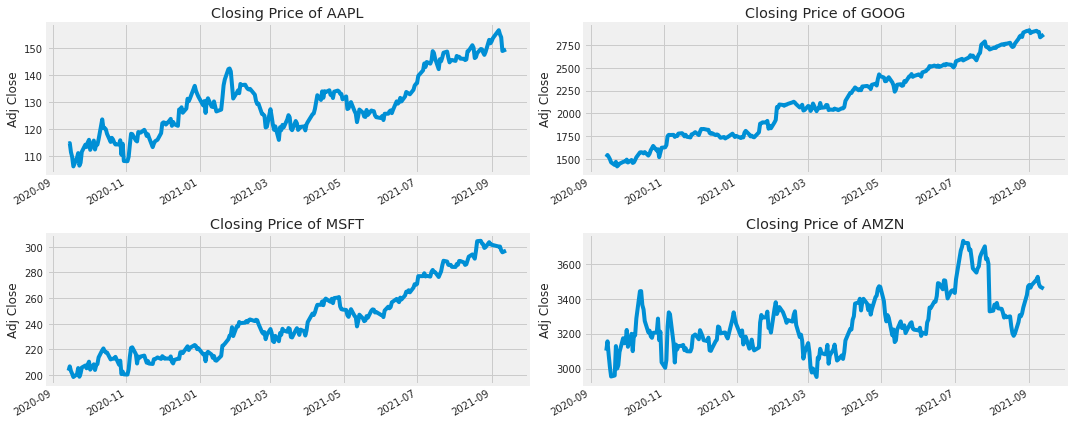

In [ ]:
# Adjusted Closing Price(조정종가) : 장이 마감 후 회사측의 영향을 계산해서 반영
# 조정종가의 역할 : 투자자로 하여금 한정된 자산에서 투자하였을 때 얼마만큼을 벌 수 있는지 보여주는 것.
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom = 1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i -1]}")

plt.tight_layout()

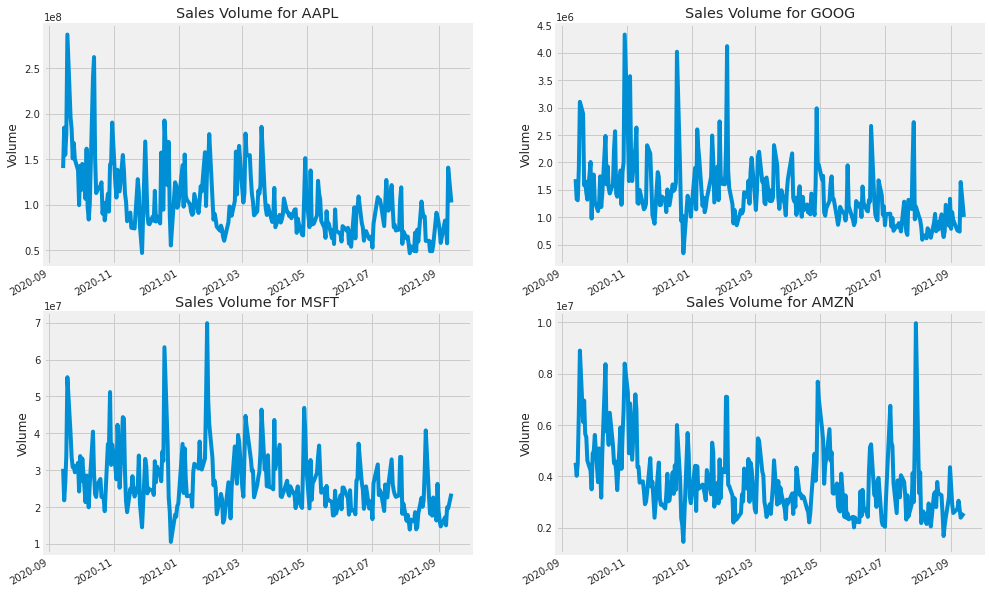

In [ ]:
# 각날의 거래된 주식의 총양을 그려보자.
plt.figure(figsize=(15,7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company["Volume"].plot()
  plt.ylabel("Volume")
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i-1]}")


### 2. 다양한 주식의 이동평균은 얼마 였는가?
* 이동평균선을 보는 이유
  * 이동평균선의 목적은 주식 시세의 예측 지표. 주가나 매매량의 과거 평균 수준과 현재를 비교하여 장래의 움직임을 미리 알아보는 데에 사용한다.

  * 주로 현재의 추세를 알아보기 위한 지표로 활용되며 주가는 흡사 관성을 가지고 있는 듯 하여 이동평균선이 상승하고 있다면 상승장일 확률이 높고 이동평균선이 하락하고 있다면 하락장일 확률이 높다.

  * 이동평균선의 모습을 보며 향후 주가의 흐름을 예측해보고자 하는 것이 목표다.

In [ ]:
  # 10일 간격, 20일 간격, 50일 간격 이동 평균 계산
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

ma_day = [10,20,50]
for i in ma_day:
    for j, name in zip(company_name, company_list):
        name[f"MA for {i} days"] = df.loc[df.company_name==j,"Adj Close"].rolling(i).mean()

In [ ]:
pd.DataFrame(AAPL)

,Adj Close
Date,
2020-09-14 00:00:00,NaN
2020-09-15 00:00:00,NaN
2020-09-16 00:00:00,NaN
2020-09-17 00:00:00,NaN
2020-09-18 00:00:00,NaN
...,...
2021-09-10 00:00:00,152.885
2021-09-13 00:00:00,152.98
MA for 10 days,Date 2020-09-14 NaN 2020-09-15 ...


In [ ]:
df.loc[:,["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].head()

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2020-09-14,114.622765,NaN,NaN,NaN
2020-09-15,114.801620,NaN,NaN,NaN
2020-09-16,111.413406,NaN,NaN,NaN
2020-09-17,109.634850,NaN,NaN,NaN
2020-09-18,106.157211,NaN,NaN,NaN


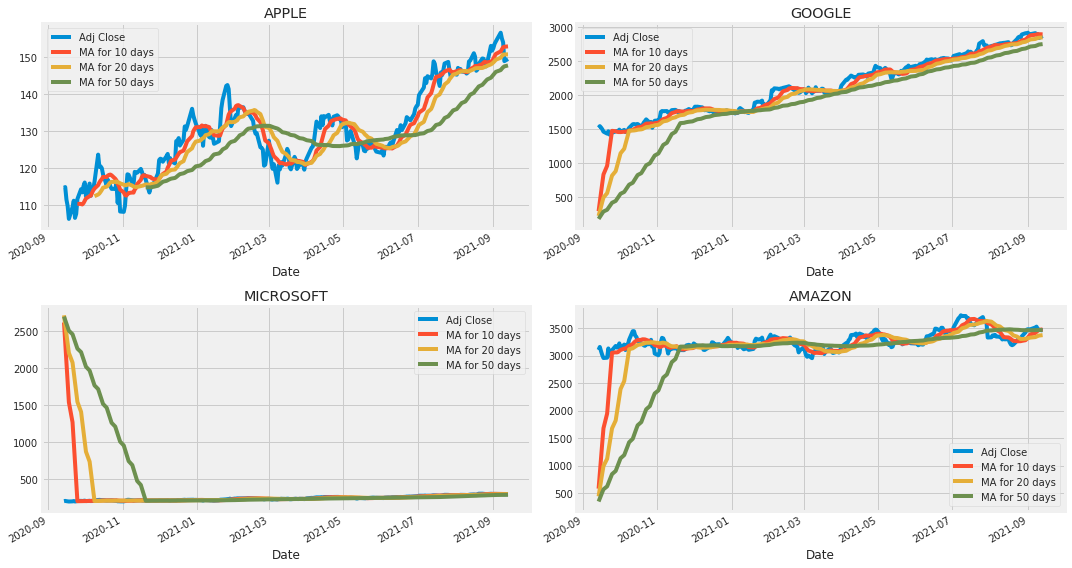

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_figheight(8)
fig.set_figwidth(15)

df.loc[df.company_name=='APPLE',["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE")

df.loc[df.company_name=="GOOGLE",["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")

df.loc[df.company_name=="MICROSOFT",["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT")

df.loc[df.company_name=="AMAZON",["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON")

fig.tight_layout()

### 3. 주식의 하루 평균 수익률은 얼마인가?

* 기본적인 분석을 1,2에서 하였고 조금 더 깊게 들어가 보겠다. 주식 리스크 분석을 진행하면서 주식의 일별 변화량을 자세히 봐야 한다. 
  * 주식의 절대 가치뿐 아니라 매일 변동되는 주식에 대해 자세히 살펴보기 위해 애플 주식의 일일 수익률을 살펴보기 위해 pandas를 사용해 보겠다.
  * 수익률 함수 : pct_change()
    * 시점별 수익률 = 
$ \frac {(현재 시점 값) - (이전 시점 값)} {이전 시점 값} $
    * 각 시점별 수익률을 계산한다.

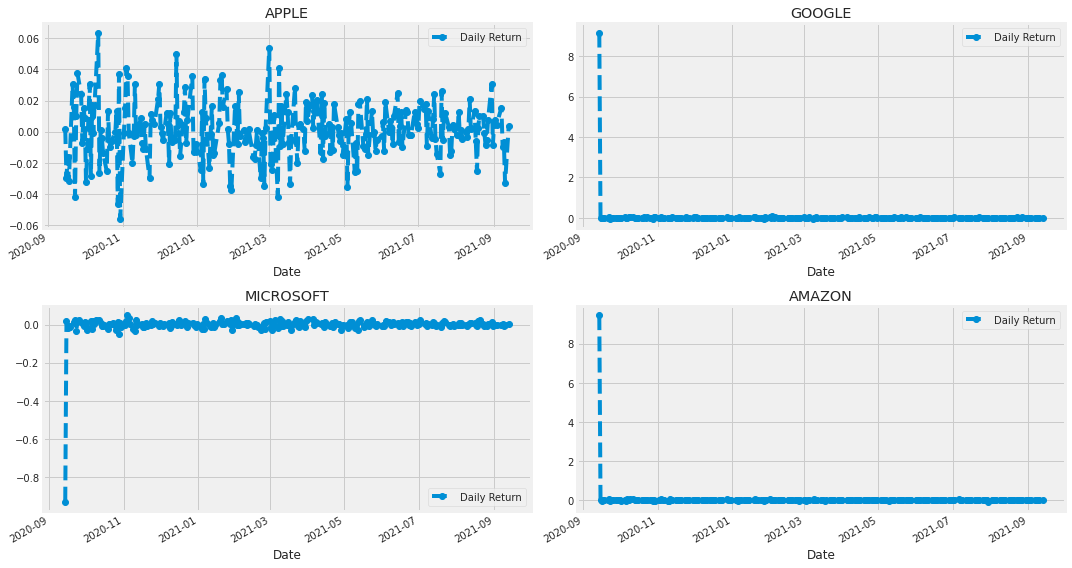

In [ ]:
# 일별 % 변화량을 찾기 위해 pct_change를 사용하겠다.
df['Daily Return'] = df['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

df.loc[df.company_name=="APPLE",'Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

df.loc[df.company_name=="GOOGLE",'Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

df.loc[df.company_name=="MICROSOFT",'Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

df.loc[df.company_name=="AMAZON",'Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


* 전반적인 히스토그램을 사용한 일 평균 수익을 살펴보자.
* seaborn으로 히스토그램과 kde plot을 그려보겠다.

In [ ]:
plt.figure(figsize=(12,7))
for i, company in enumerate(compane_list, 1) :
  plt.subplot(2,2,i)
  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
  plt.ylabel("Daily Return")
  plt.title(f'{company_name[i-1]}')
plt.tight_layout()

NameError: ignored